**Author:** Priyadharsshini Sakrapani

In [26]:
# Importing Pandas library and all files
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib_venn import venn2
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
athletes_df = pd.read_csv('olympic_athletes.csv')
population_df = pd.read_csv('population.csv')
game_df = pd.read_csv('game_consoles.csv')

##### The function yearly_population_change takes a dataframe df as input, filters and aggregates the data by continent and year, and then plots a line graph of the yearly population change for each continent over time. The continents are distinguished by different colors and the legend is displayed in the center of the graph.

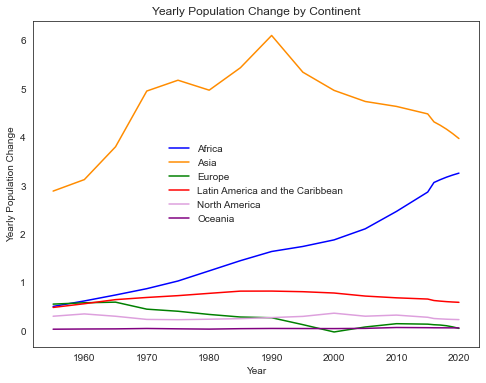

In [27]:
def yearly_population_change(df):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Defining the Continents to iterate
    continents = ['Africa', 'Asia', 'Europe', 'Latin America and the Caribbean', 'North America', 'Oceania']
    # Defining the colors to use for each continent
    colors = ['blue', 'darkorange', 'green', 'red', 'plum', 'purple']
    for con, color in zip(continents, colors):
        # Filter the data for the current continent
        filt = population_df[population_df['Continent'] == con]
        # Aggregate the YearlyChange by Year
        filtered = filt.groupby(['Year'], as_index=False)['YearlyChange'].sum()
        
        # Plot the line using Seaborn's lineplot function
        sns.lineplot(data=filtered, x='Year', y='YearlyChange', color=color, ax=ax, label=con)

    # Set the x and y labels
    ax.set_xlabel('Year')
    ax.set_ylabel('Yearly Population Change')
    ax.set_title('Yearly Population Change by Continent')
    # Set the legend
    ax.legend(loc='center', framealpha=0)
    # Set the y-axis ticks and labels
    new_yticklabels = ["0", "0", "1", "2", "3", "4", "5", "6"]
    ax.set_yticklabels(new_yticklabels)
    # Show the plot
    plt.show()

yearly_population_change(population_df)

##### This code visualizes the average height of Olympians in the Summer Olympics over time, separated by gender. The data is taken from a dataframe called athletes_df. The code first filters the dataframe to only include Summer Olympics and removes duplicates for each athlete's first appearance in a given year. It then uses Seaborn to plot a line graph of the average height of athletes over time, with shaded areas showing the standard deviation. The lines are colored by gender (blue for male and red for female)

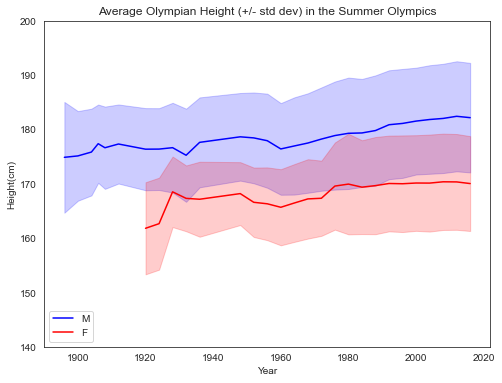

In [28]:
height_df = athletes_df[athletes_df.Season=='Summer'].drop_duplicates(subset=['Name','Year'], keep='first')
plt.figure(figsize=(8,6))
ax=sns.set_style('white');
sns.set_palette(['blue', 'red'])

ax=sns.lineplot(data=height_df,x='Year', y='Height',hue='Sex',ci="sd")
ax.set_ylabel("Height(cm)")

# Set the y-axis ticks and labels
new_yticklabels = ['140', '150', '160', '170', '180', '190', '200']
plt.yticks([140, 150, 160, 170, 180, 190, 200], new_yticklabels)
plt.title('Average Olympian Height (+/- std dev) in the Summer Olympics')
ax.legend(loc='lower left')
plt.show()

##### The code creates a pie chart visualizing the best selling video game consoles by companies Nintendo, Sony, and Microsoft. The size of the inner pie represents the total units sold by each company, and the outer pie represents the units sold for each console. The colors of the outer pie are aligned with the colors of the inner pie to represent the corresponding company. The resulting chart shows the relative sales of each console for the three companies.

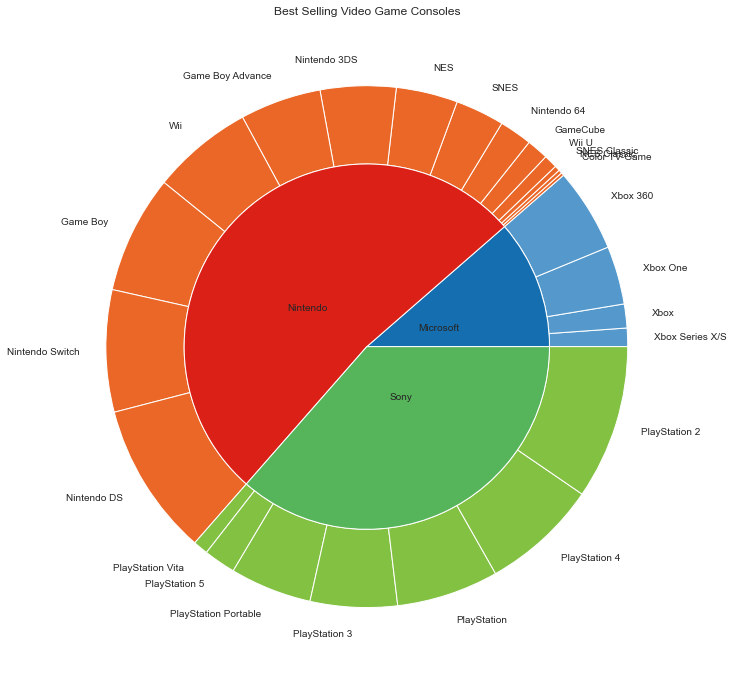

In [29]:
fig, ax = plt.subplots(figsize=(24,12))
size = 0.3

company = game_df.groupby('Company').agg('sum')['Units_sold']
consoles = game_df.groupby(['Company','Console']).agg('sum')['Units_sold']

comp_colors = ['#156EAF', '#DB2018', '#56B45B']

# To align the outer pie color according to inner pie color
company_colors = {'Nintendo': '#EA6727', 'Sony': '#83C143', 'Microsoft': '#5599CC'}
consoles_colors = [company_colors[company] for company, _ in consoles.index]

# Sort the consoles
consoles = consoles.reset_index().sort_values(['Company', 'Units_sold'], ascending=[True, True])

ax.pie(consoles['Units_sold'], radius=1,
       labels=consoles['Console'],
       colors=consoles_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(company.values.flatten(), radius=1-size,
        labeldistance=0.3,
        labels=company.index,
       colors=comp_colors,
        wedgeprops=dict(edgecolor='w', linewidth=1))

ax.set(aspect="equal", title='Best Selling Video Game Consoles')
plt.show()


##### This code creates a horizontal bar chart to show the change in the number of athletes per country from the 2012 Olympics to the 2016 Olympics. It also includes a Venn diagram as a legend to show the number of athletes who participated in both years for a selected set of countries. The data is filtered to include only the top 15 countries with the most athletes.

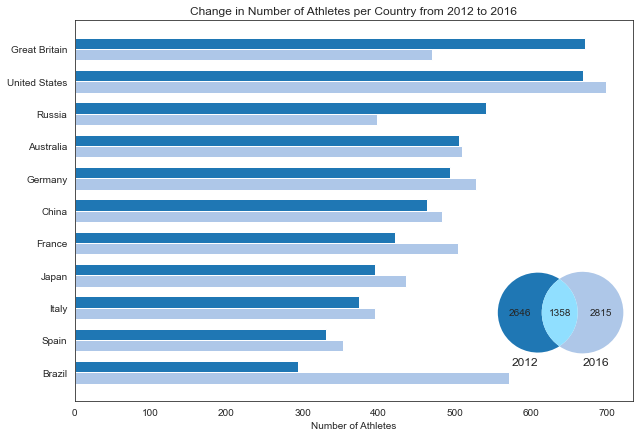

In [30]:
# Creating dataframes for the year 2012 and 2016
df_2012 = athletes_df[athletes_df['Year'] == 2012]
df_2016 = athletes_df[athletes_df['Year'] == 2016]


cm = plt.get_cmap('tab20')
# print(cm)

# Grouping by team, aggregating by taking the count of ID and sorting
aggregation = {'ID': 'count'}
groupbyCountry2012 = df_2012.groupby('Team').agg(aggregation).sort_values(by='ID', ascending=False).head(15).reset_index()
groupbyCountry2016 = df_2016.groupby('Team').agg(aggregation).sort_values(by='ID', ascending=False).head(15).reset_index()

# Creating a new column Year with the year values in the above created dataframe
groupbyCountry2012['Year'] = 2012
groupbyCountry2016['Year'] = 2016

merged = pd.merge(groupbyCountry2012, groupbyCountry2016, on='Team')
merged = merged.drop(merged[(merged['Team'] == 'Canada') | (merged['Team'] == 'Ukraine')  | (merged['Team'] == 'Poland')].index)
# Reversing the order
merged = merged.iloc[::-1]

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10,7))
bar_width = 0.35

# Set the positions of the bars on the y-axis
y_pos = np.arange(len(merged['Team']))

# Create two bars for each country, 2012 and 2016 bar
ax.barh(y_pos + bar_width/2, merged['ID_x'], bar_width, color=cm(0), label='2012')
ax.barh(y_pos - bar_width/2, merged['ID_y'], bar_width, color=cm(1), label='2016')

# Add labels and title to the chart
ax.set_xlabel('Number of Athletes')
ax.set_title('Change in Number of Athletes per Country from 2012 to 2016')
ax.set_yticks(y_pos)
ax.set_yticklabels(merged['Team'])

# Creating the Venn as Legend
# Filter the DataFrame for the required countries and years
df_filtered = athletes_df.loc[
    ((athletes_df['Team'].isin(['Great Britain', 'United States', 'Russia', 'Australia', 'Germany', 'China', 'France', 'Japan', 'Italy', 'Spain', 'Brazil'])) &
     (athletes_df['Year'].isin([2012, 2016])))
]

# Get the set of athletes who participated in both years
set_2012 = set(df_filtered[df_filtered['Year'] == 2012]['ID'])
set_2016 = set(df_filtered[df_filtered['Year'] == 2016]['ID'])
set_both = set_2012.intersection(set_2016)

# Get the total number of athletes for each category
total_2012 = len(set_2012)
total_2016 = len(set_2016)
total_both = len(set_both)


# Create a new set of axes in the bottom right corner
ax_v = plt.axes([0.70, 0.2, 0.2, 0.2])

venn2(subsets=(abs(total_both-total_2012), abs(total_both-total_2016), total_both),
       set_colors=(cm(0), cm(1)), 
       set_labels=('2012', '2016'), ax=ax_v, alpha=1.0)


# venn2(subsets = (abs(total_both-total_2012), abs(total_both-total_2016), total_both),  set_colors=(cm(0), cm(1)), set_labels = ('2012', '2016'), ax=ax_v)
# plt.show()

# Remove the x and y ticks and labels from the Venn diagram axes
ax_v.set_xticks([])
ax_v.set_yticks([])
ax_v.set_xticklabels([])
ax_v.set_yticklabels([])


plt.show()

